In [1]:
# To find ECD Control
import time
import sys 
#sys.path.append('C:\\Users\\Eesh Gupta\\Documents\\RU Research\\Chakram')


In [2]:
# Where the most recent versions of all code files are stored
classes_path ='C:\\Users\\Eesh Gupta\\Documents\\RU Research\\Chakram\\Multimode-Conditional-Displacements\\hpc_runs\\two_mode_ecd\\class_description'
sys.path.append(classes_path)
#For Alec's ECD repository
sys.path.append('C:\\Users\\Eesh Gupta\\Documents\\RU Research\\Chakram')
#sys.path

In [3]:
import numpy as np
from qutip import *
from DECD_paramV2 import FixedBatchOptimizer as BatchOptimizer
from Simulation_Classes_Two_ModeV5 import *
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [4]:
#import pandas as pd

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
#Modes Truncation
N1 = 3#15
N2 = 3#15

In [13]:
def two_mode_state(fock1, fock2, qubit_g = True): 
    '''
    Returns g x fock1 x fock 2
    
    #takes N1, N2 from global
    '''
    psi_1 = basis(N1,fock1) #initial state
    psi_2 = basis(N2,fock2)
    return tensor(basis(2,0), psi_1, psi_2)

In [ ]:
def bin_code_state_L(mode): 
    '''
    Returns logical states of bin code
    '''
    up = (two_mode_state(1,0)) + (two_mode_state(1,0))

# Get Pulses

In [7]:
best_angles_filename = 'Data/test_1_best_angles.txt'
T1_mode1 = 2e+6 #2ms
T1_mode2 = 2e+6 #2ms

pulse_sim = ecd_pulse_two_mode(param_file = best_angles_filename,
                              kappa1 = 1/T1_mode1,
                              kappa2 = 1/T1_mode2)

In [8]:
pulse_sim.get_pulses()

---------------------------------------------------
final displacement is 0.7118828047550715


C:\Users\Eesh Gupta\anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


---------------------------------------------------
final displacement is 0.7063274878747512
---------------------------------------------------
final displacement is 2.1645129036466693
---------------------------------------------------
final displacement is 2.4205577267098803


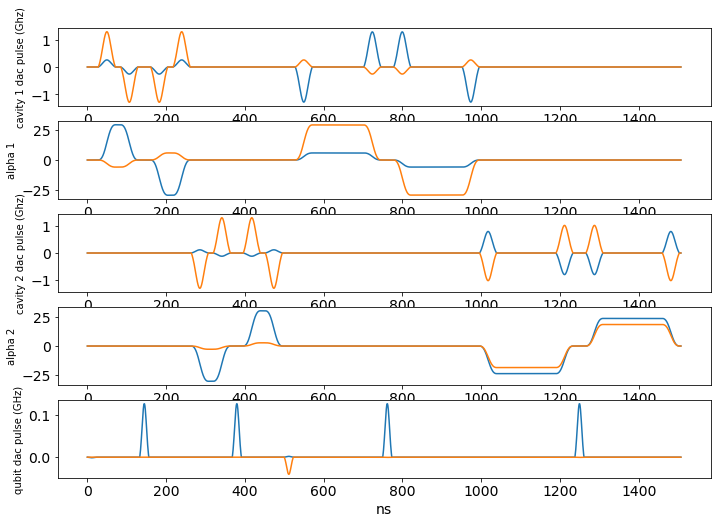

In [9]:
pulse_sim.plot_pulses()

# Qutip Simulation

In [10]:
qutip_sim  = qutip_sim_two_mode(n_q = 2, n_c1 = N1, n_c2 = N2, alpha1 = pulse_sim.alpha1, alpha2 = pulse_sim.alpha2, qubit_pulse = pulse_sim.qubit_dac_pulse_GHz)

In [11]:
# Add various terms 

# to the hamiltonian 
qutip_sim.add_bare_qubit_mode_coupling() # chi/2 adag a sigmaz
qutip_sim.add_mode_mode_coupling()
qutip_sim.add_stark_shift() # chi/2 alpha^2 sigmaz

# to the collapse operators (noise)
# qutip_sim.add_qubit_relaxation(T1 = 30e+3) # T1 in nanoseconds
# qutip_sim.add_qubit_dephasing(T1 = 30e+3, Techo = 50e+3) # T1, T2 in nanoseconds
# qutip_sim.add_cavity_relaxation(T1_mode1 = 2e+6, T1_mode2 = 2e+6) # assumes kappa correction to equation of motion in pulses
# qutip_sim.add_cavity_dephasing(T1_mode1 = 2e+6, Techo_mode1 = 3e+6, T1_mode2 = 2e+6, Techo_mode2 = 3e+6) # T1, T2 from photon blockade paper


In [14]:
qutip_sim.me_solve(initial = two_mode_state(1,0))  #initial state by default is g0

C:\Users\Eesh Gupta\anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


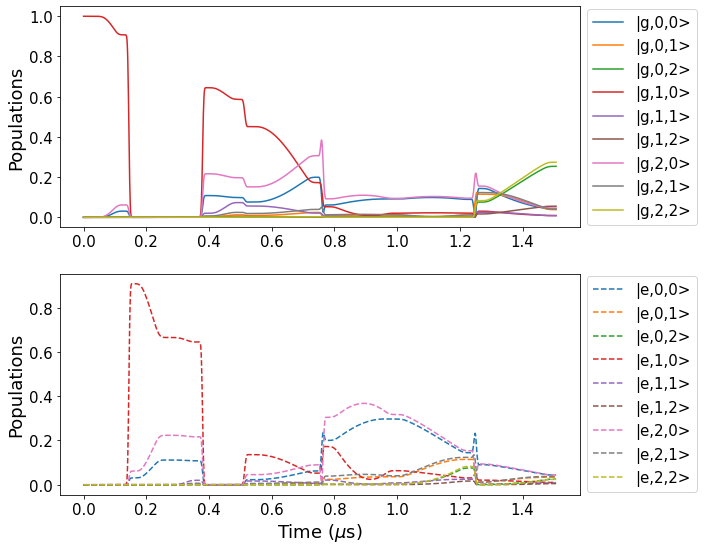

In [15]:
qutip_sim.plot_populations()

In [16]:
target = two_mode_state(0,1)
qutip_sim.get_fidelity(target)

(0.03806690672818407+0j)